In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [4]:
creditcard_df = pd.read_csv("data/Marketing_data.csv")

In [5]:
creditcard_df.shape

(8950, 18)

In [6]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
creditcard_df[creditcard_df.ONEOFF_PURCHASES == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [13]:
creditcard_df[creditcard_df.CASH_ADVANCE == creditcard_df.CASH_ADVANCE.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# Exploração de dados

## Pré-Processamento

<AxesSubplot:>

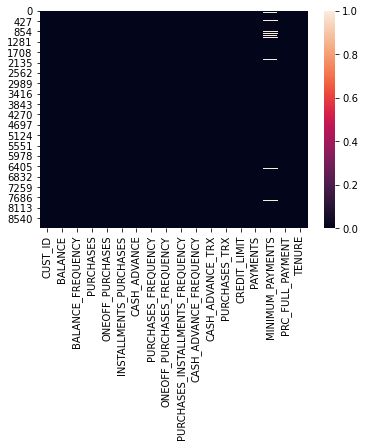

In [14]:
sns.heatmap(creditcard_df.isnull())

In [15]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [18]:
creditcard_df.loc[(creditcard_df.MINIMUM_PAYMENTS.isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df.MINIMUM_PAYMENTS.mean()

In [19]:
creditcard_df.loc[(creditcard_df.CREDIT_LIMIT.isnull() == True), 'CREDIT_LIMIT'] = creditcard_df.CREDIT_LIMIT.mean()

In [20]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

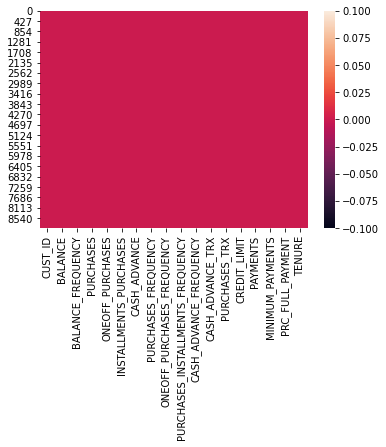

In [21]:
sns.heatmap(creditcard_df.isnull())

In [23]:
creditcard_df.duplicated().sum()

0

In [24]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [25]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Visualização

In [26]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\breve\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\breve\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\breve\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

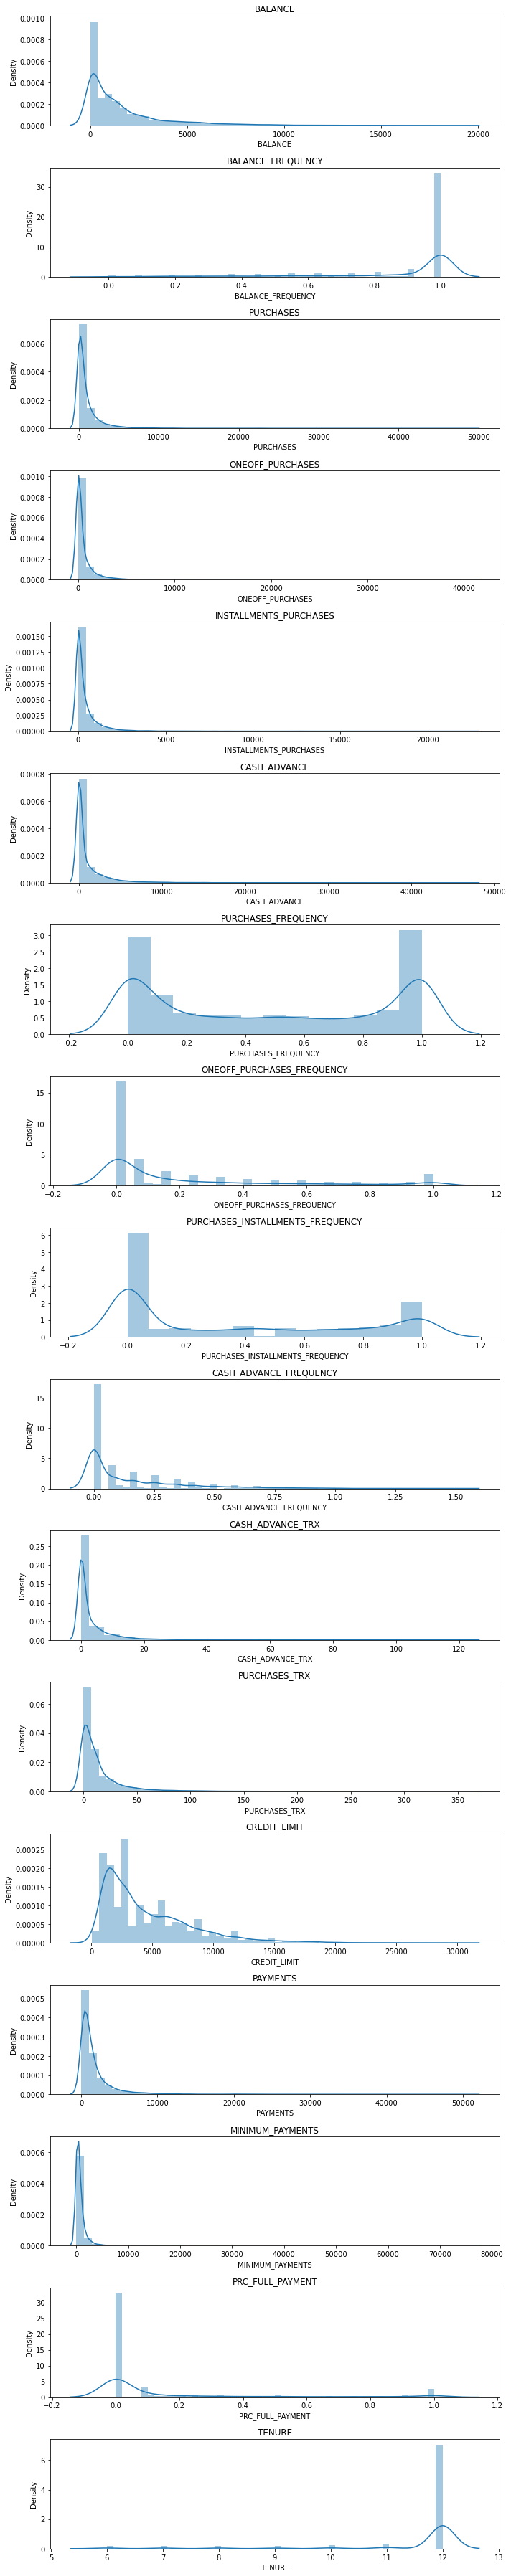

In [30]:
plt.figure(figsize = (10, 50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(len(creditcard_df.columns), 1, i + 1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
    plt.title(creditcard_df.columns[i])
plt.tight_layout()

In [31]:
correlations = creditcard_df.corr()

<AxesSubplot:>

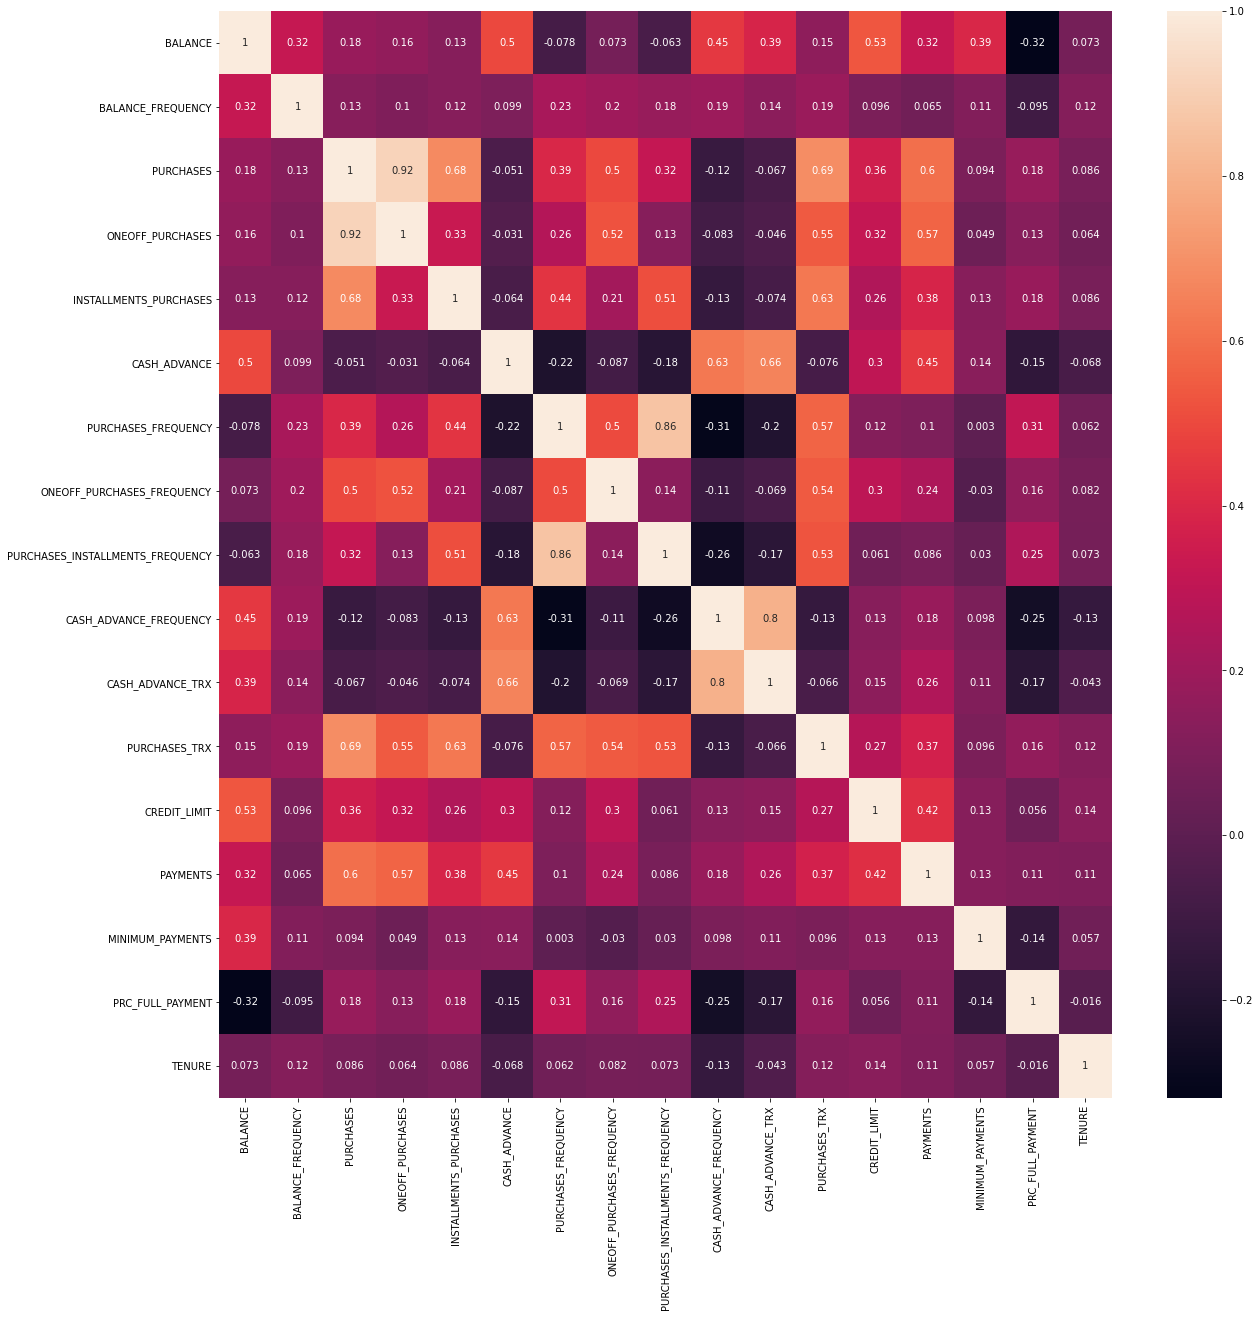

In [32]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

## Definição do número de clusters

In [33]:
min(creditcard_df.BALANCE), max(creditcard_df.BALANCE)

(0.0, 19043.13856)

In [36]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [37]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [38]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [39]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [40]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    wcss_1.append(kmeans.inertia_)

In [41]:
print(wcss_1)

[152149.99999999878, 127785.19639267019, 111986.37192027447, 99073.94384131934, 91502.53365001439, 84852.45300468434, 79532.32854113275, 75569.44343168719, 69858.60594398275, 66455.26553539316, 63618.964484429926, 61374.66015577979, 59144.76319298017, 57502.07528660748, 55890.16417791927, 54583.12322548765, 53280.18688380769, 52168.61066434181, 50698.804508316374]


Text(0, 0.5, 'WCSS')

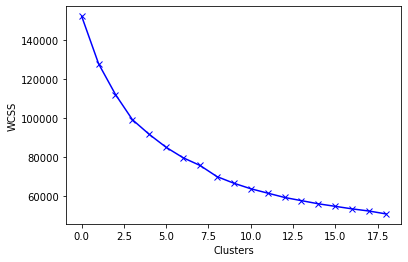

In [43]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

Pelo gráfico, nota-se uma inflexão entre os pontos próximos a 7-9 clusters

## Agrupamento com k-mens

In [44]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [46]:
labels, len(labels)

(array([0, 1, 3, ..., 6, 0, 0]), 8950)

In [47]:
np.unique(labels, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([2912,  947,  358, 1205,   25, 1291, 2156,   56], dtype=int64))

In [48]:
kmeans.cluster_centers_

array([[-1.90401892e-02,  3.68911240e-01, -3.60827269e-01,
        -2.43957615e-01, -4.04893826e-01, -8.15040380e-02,
        -8.65243261e-01, -3.96827536e-01, -7.67539903e-01,
         1.39148083e-01, -2.46909003e-02, -4.87840815e-01,
        -3.44968674e-01, -2.68008899e-01, -7.55727417e-02,
        -4.53766715e-01, -8.96499684e-03],
       [ 1.56282355e+00,  3.71056937e-01, -2.32164702e-01,
        -1.64218610e-01, -2.47318726e-01,  1.94747610e+00,
        -4.85760792e-01, -2.11751572e-01, -4.33132483e-01,
         1.91534689e+00,  1.85244613e+00, -2.82366629e-01,
         9.53798098e-01,  7.36928737e-01,  3.33291830e-01,
        -3.90886534e-01, -1.03098178e-01],
       [ 1.01235337e+00,  4.67594827e-01,  2.47643981e+00,
         1.83299176e+00,  2.48807651e+00, -1.55681961e-01,
         1.16683853e+00,  1.58787360e+00,  1.27190654e+00,
        -2.78813621e-01, -1.47387299e-01,  3.10937257e+00,
         1.28562166e+00,  1.44598816e+00,  3.59813036e-01,
         2.63775924e-01,  3.3

In [49]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.019040,0.368911,-0.360827,-0.243958,-0.404894,-0.081504,-0.865243,-0.396828,-0.767540,0.139148,-0.024691,-0.487841,-0.344969,-0.268009,-0.075573,-0.453767,-0.008965
1,1.562824,0.371057,-0.232165,-0.164219,-0.247319,1.947476,-0.485761,-0.211752,-0.433132,1.915347,1.852446,-0.282367,0.953798,0.736929,0.333292,-0.390887,-0.103098
2,1.012353,0.467595,2.476440,1.832992,2.488077,-0.155682,1.166839,1.587874,1.271907,-0.278814,-0.147387,3.109373,1.285622,1.445988,0.359813,0.263776,0.337720
3,-0.115521,0.393943,0.519813,0.642773,0.048056,-0.327565,0.959752,1.835990,0.184235,-0.406437,-0.330874,0.598355,0.437184,0.128267,-0.155471,0.405434,0.206635
4,1.819469,0.301643,12.207777,12.296446,6.272587,0.242957,1.002411,2.032081,0.866148,-0.392172,-0.124384,4.369530,3.261192,8.782991,1.003073,1.152351,0.300900
5,-0.698378,-2.138646,-0.317901,-0.236753,-0.316613,-0.306907,-0.564765,-0.435478,-0.459136,-0.486405,-0.360951,-0.427912,-0.211228,-0.222803,-0.255222,0.253520,-0.156374
6,-0.400572,0.306954,-0.060837,-0.256106,0.326619,-0.360987,0.983317,-0.409192,1.176808,-0.460112,-0.356542,0.137915,-0.322025,-0.242373,-0.120684,0.363693,-0.031327
7,1.223994,0.470114,-0.069823,-0.229472,0.255890,0.126383,-0.077078,-0.482305,0.118144,-0.087875,0.039423,0.046876,-0.025468,-0.004410,9.405169,-0.520463,0.293962


* Grupo 0 (VIP/Prime): Limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras.

* Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Posui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito.

* Grupo 5: Usam o catão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). pagam muito pouco a fatura completa (0.03).

* Grupo 7 (Clientes Novos): Clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863).

In [50]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1524.844281,0.964662,232.291813,187.517697,44.927182,807.953337,0.143087,0.084076,0.059397,0.162989,3.080330,2.583934,3239.312278,957.284350,688.087456,0.020996,11.505321
1,4817.360120,0.965171,507.181370,319.868114,187.420390,5062.819463,0.295391,0.139288,0.192299,0.518425,15.890411,7.691254,7964.757161,3866.480338,1640.929092,0.039387,11.379347
2,3671.602908,0.988040,6294.156648,3634.828268,2661.004358,652.398767,0.958659,0.676151,0.869926,0.079351,2.243017,91.997207,9172.067039,5919.137890,1702.735644,0.230865,11.969274
3,1324.027099,0.970592,2113.792768,1659.309493,454.524007,291.951957,0.875545,0.750169,0.437657,0.053812,0.990856,29.582710,6085.103151,2104.464018,501.888478,0.272297,11.793849
4,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,0.490758,11.920000
5,110.859921,0.370645,324.005124,199.476277,124.758568,335.272290,0.263683,0.072546,0.181965,0.037810,0.785604,4.073529,3725.916327,1088.150992,269.423518,0.227865,11.308050
6,730.718187,0.949985,873.225826,167.354443,706.425367,221.864595,0.885003,0.080388,0.832131,0.043071,0.815692,18.137883,3322.789408,1031.498814,582.958642,0.260089,11.475395
7,4112.115628,0.988636,854.027321,211.561607,642.465714,1243.902370,0.459416,0.058577,0.411391,0.117559,3.517857,15.875000,4401.785714,1720.377308,22782.556227,0.001488,11.910714


In [51]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)

In [52]:
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


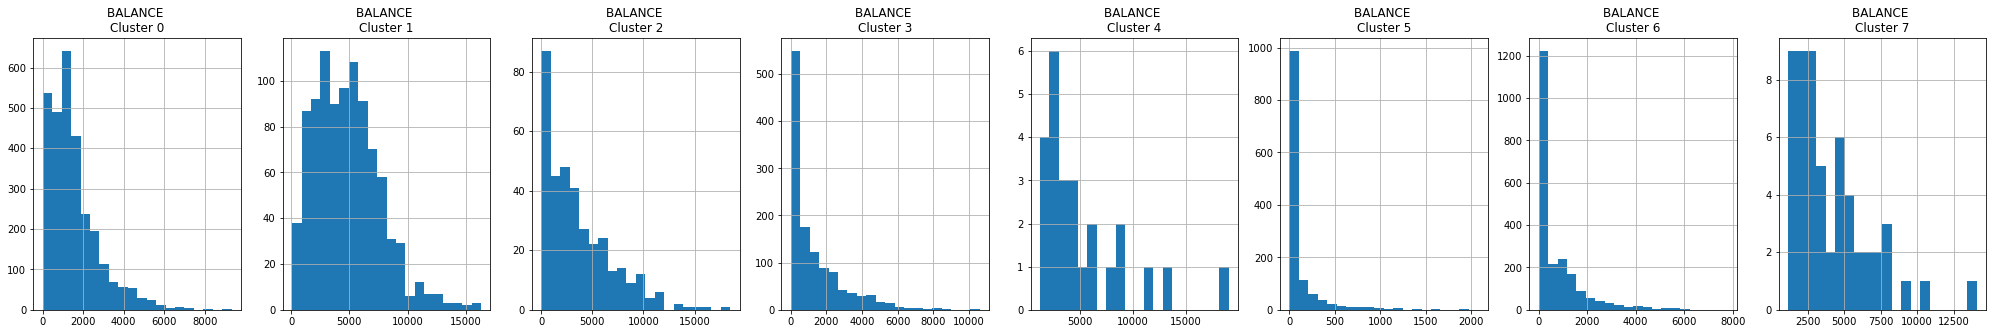

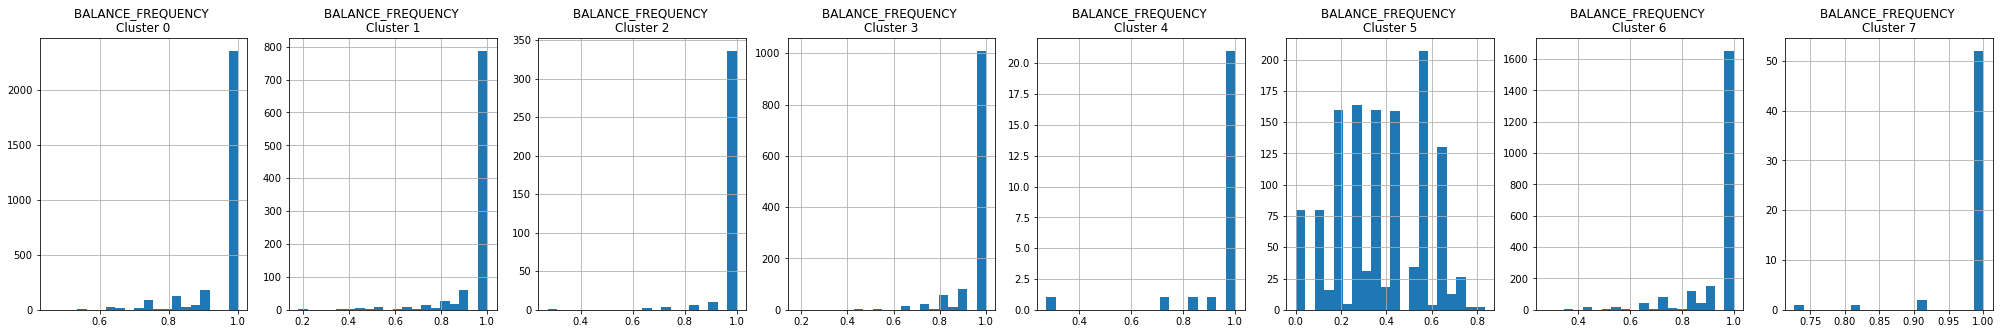

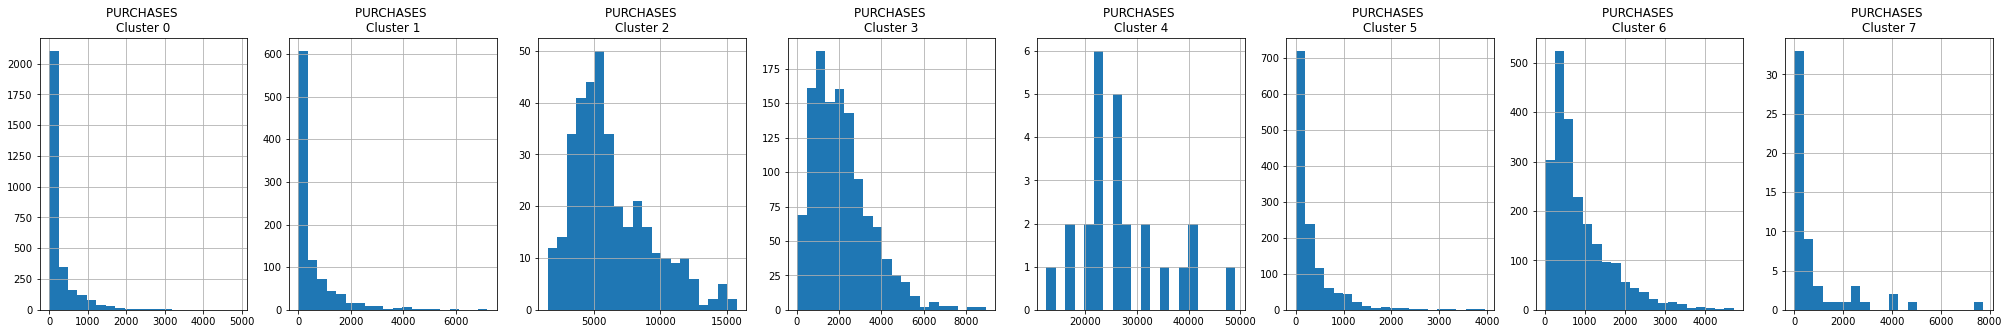

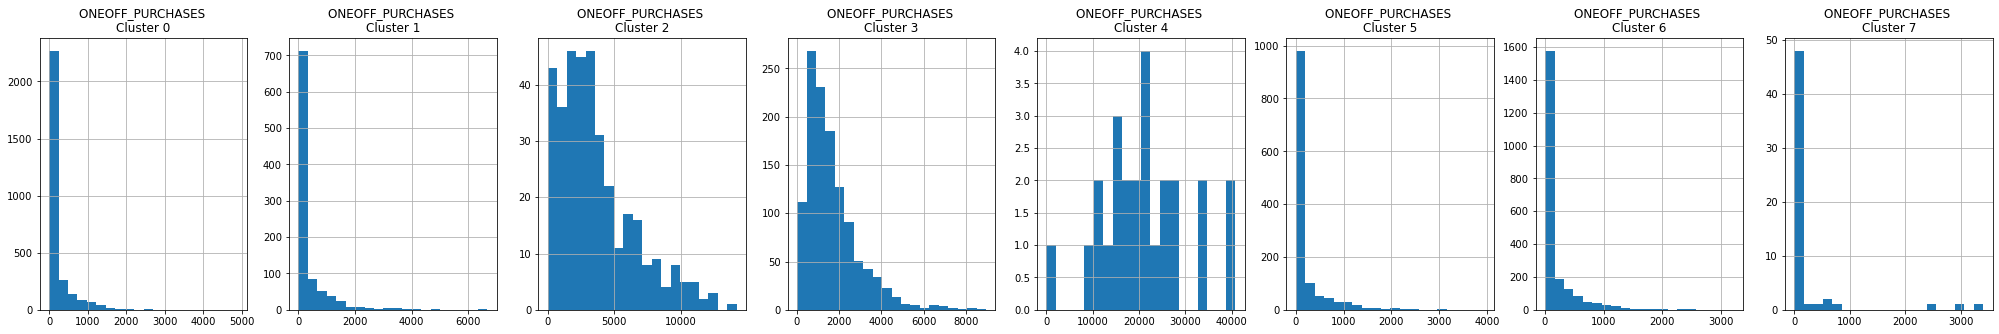

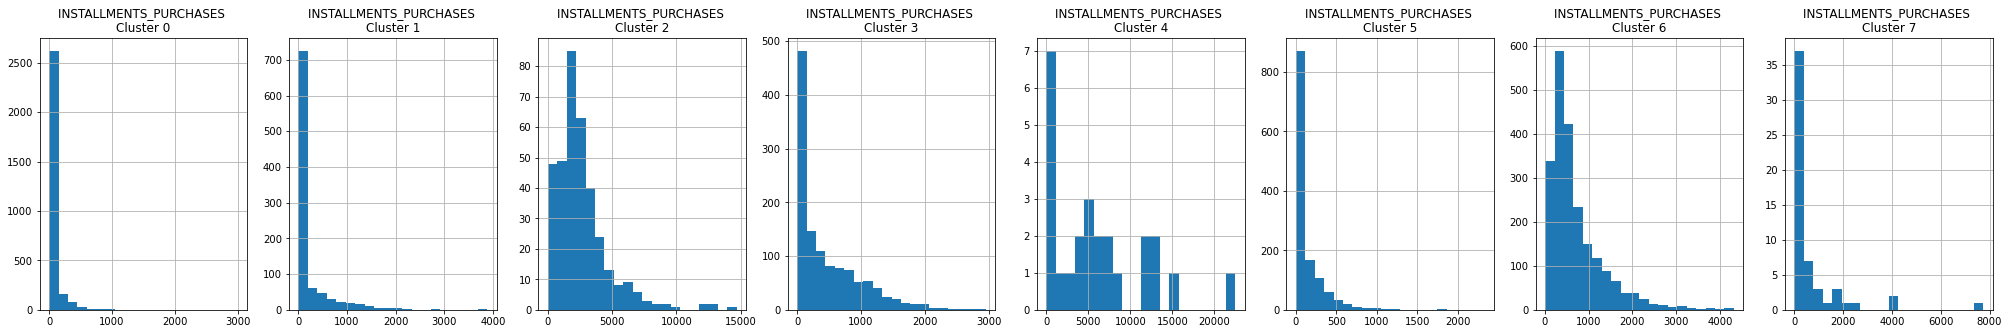

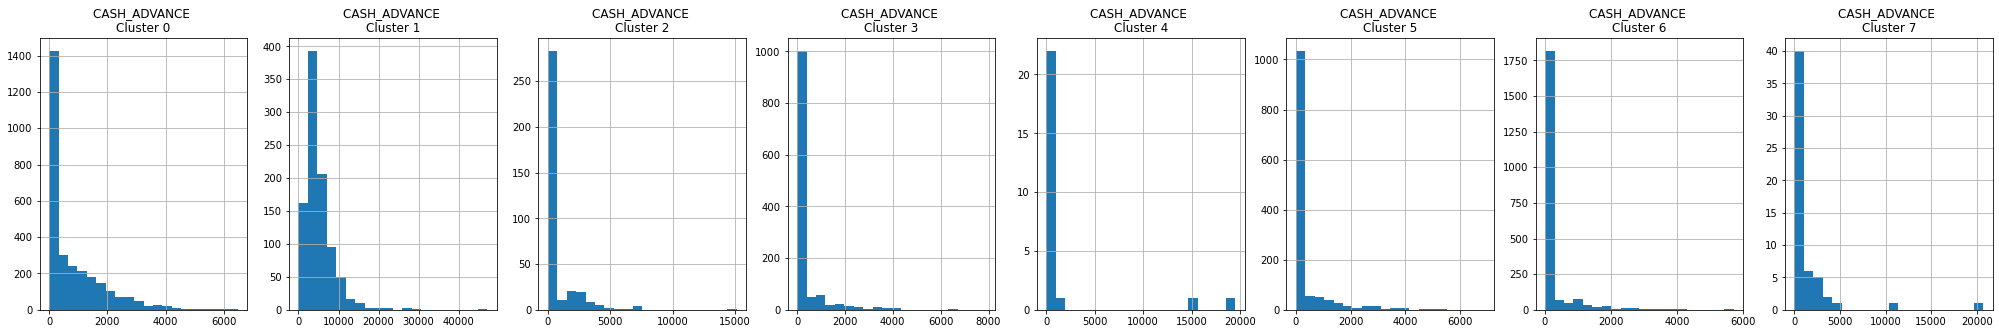

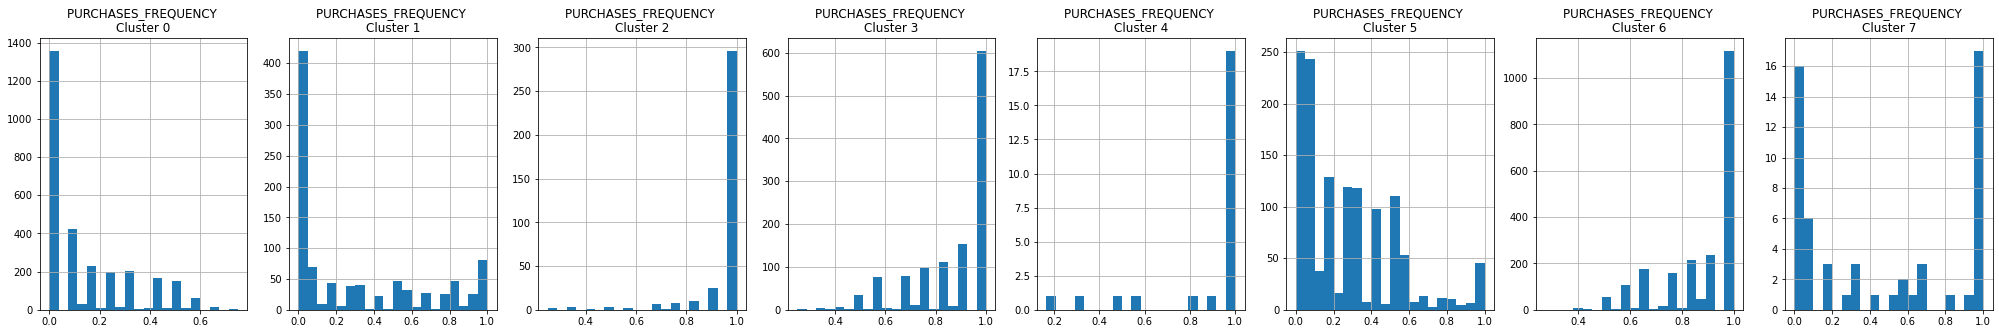

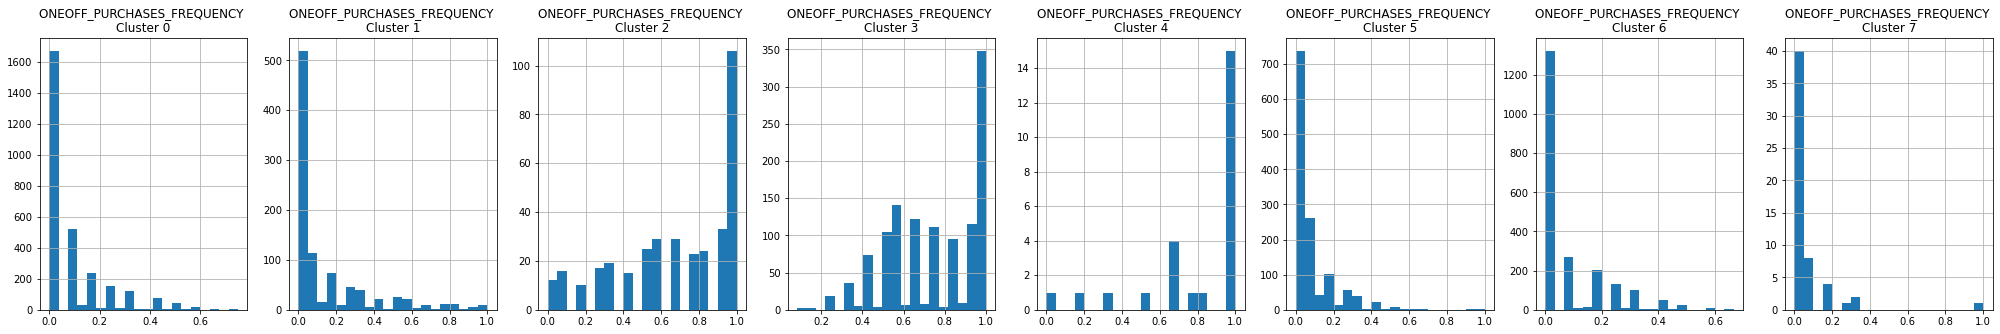

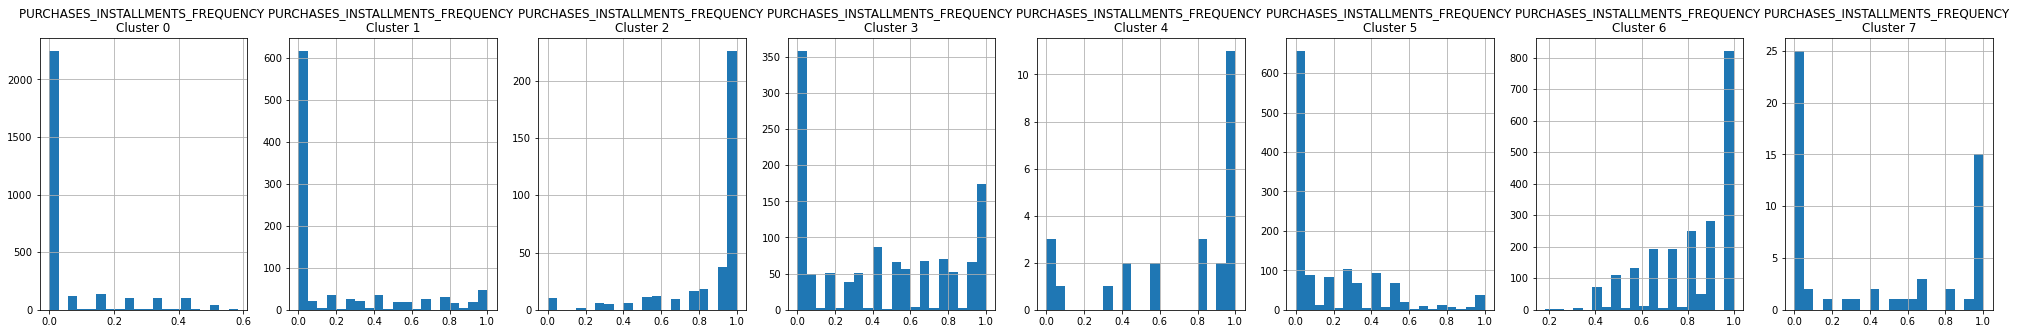

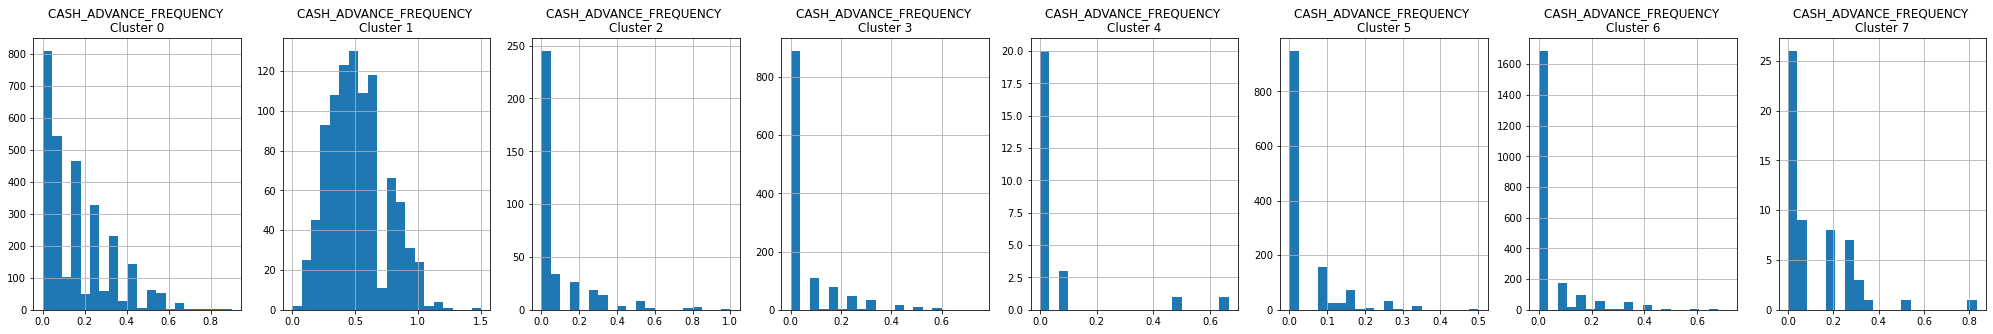

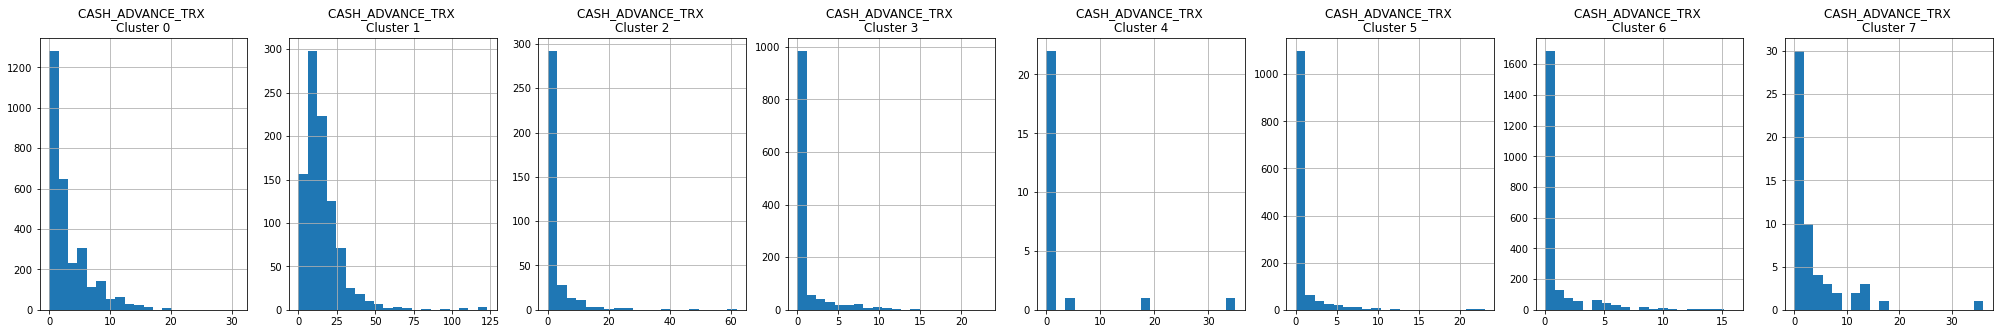

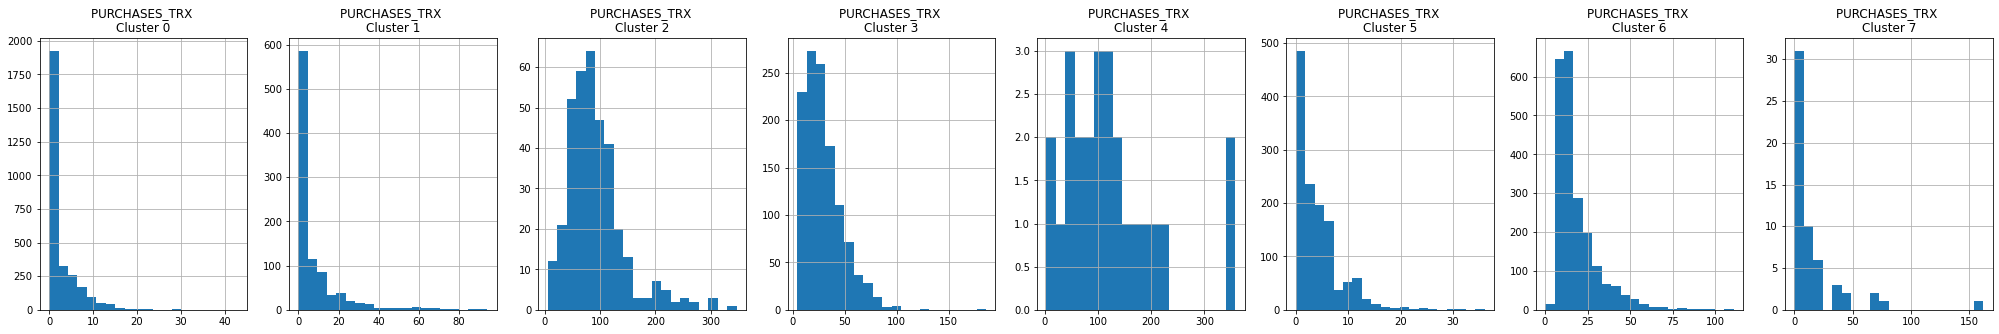

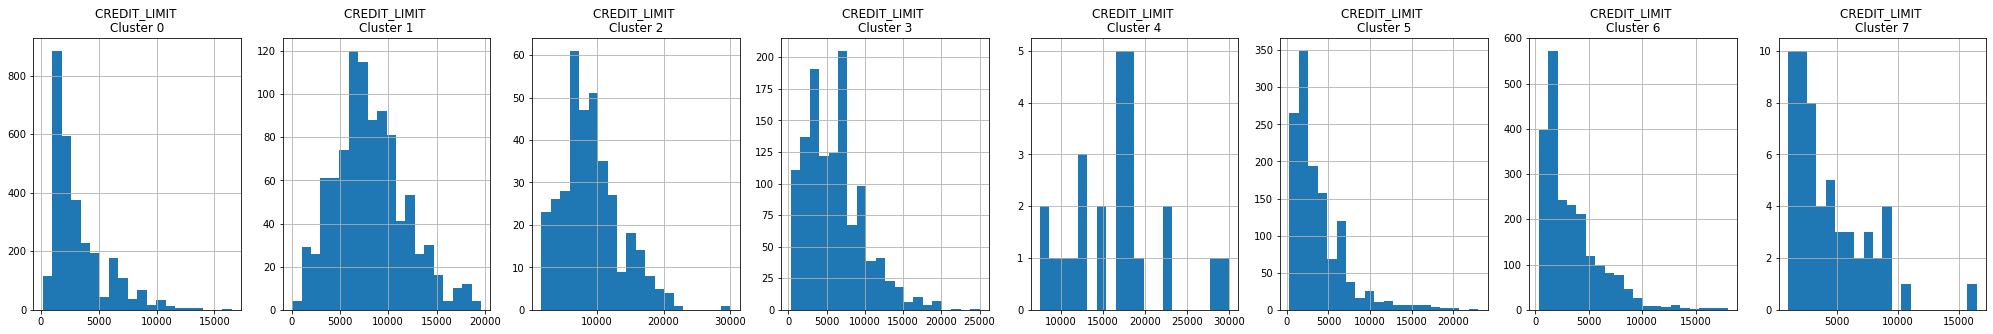

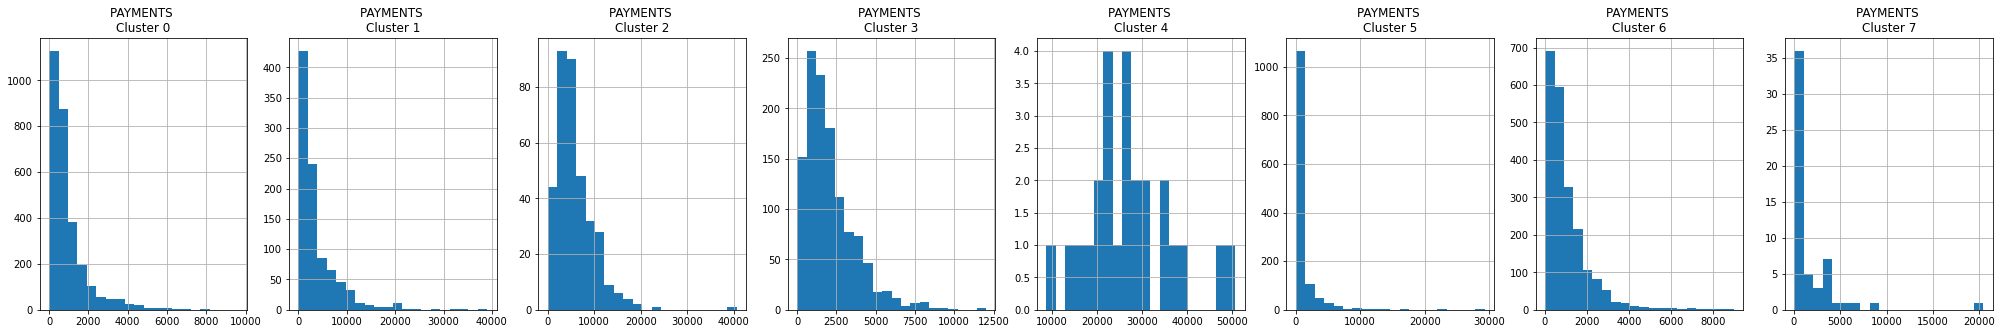

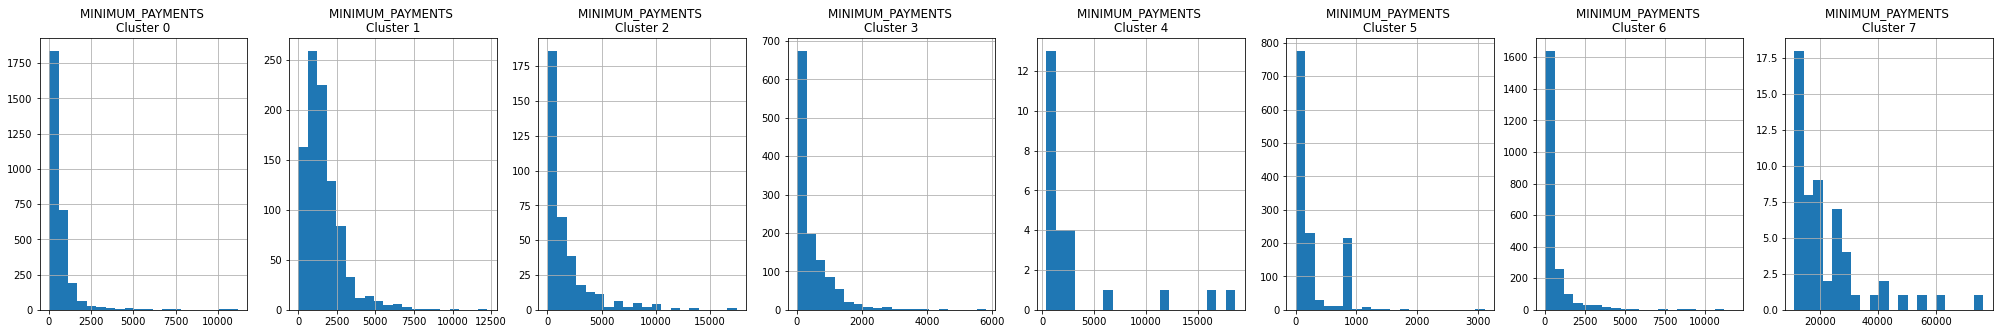

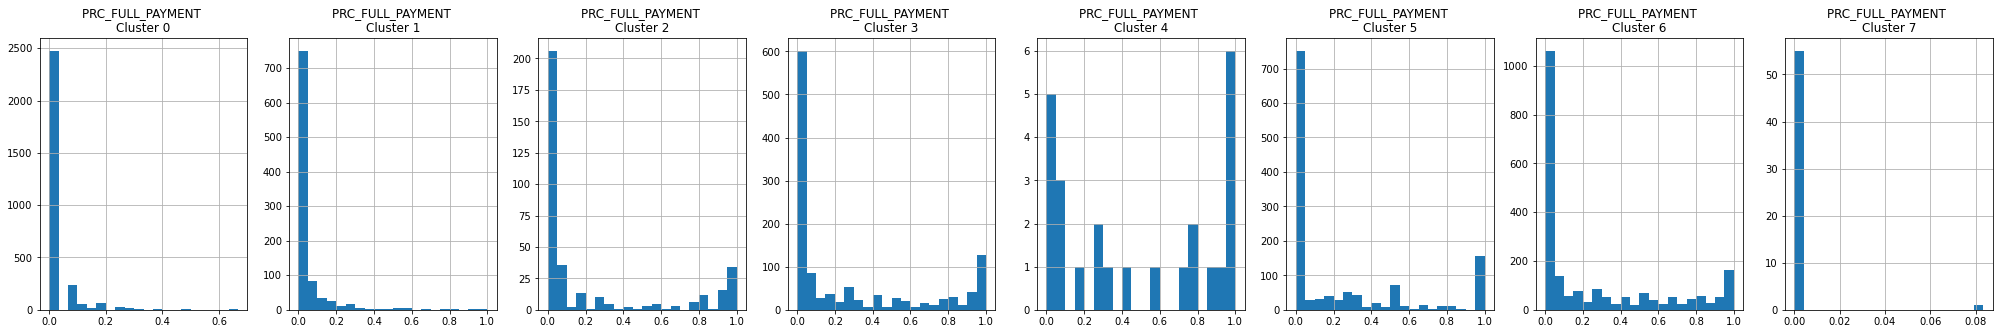

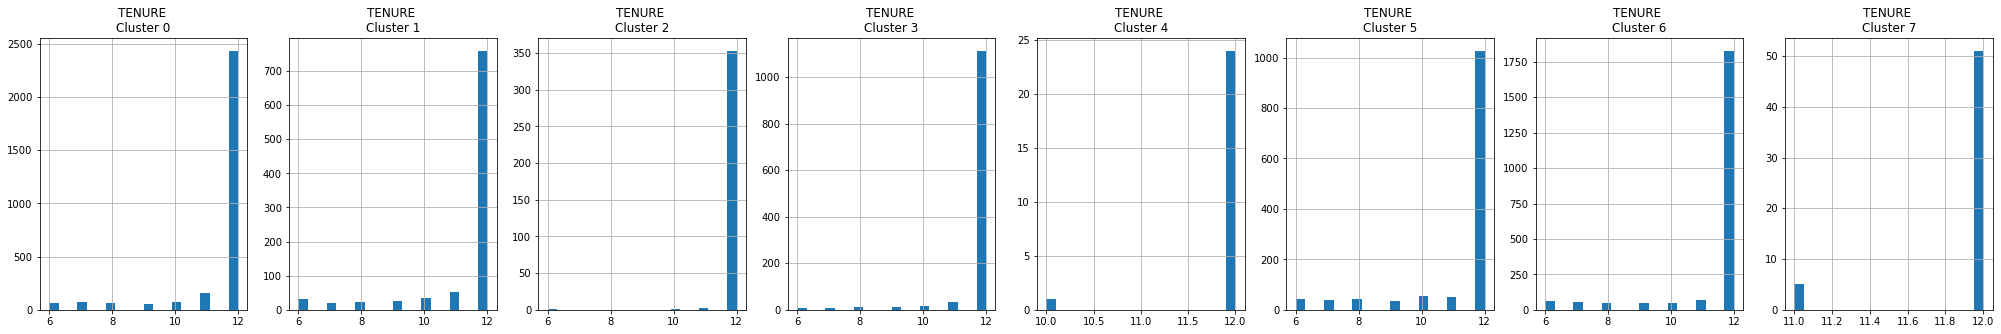

In [53]:
for i in creditcard_df.columns:
    plt.figure(figsize = (35, 5))
    for j in range (8):
        plt.subplot(1, 8, j + 1)
        cluster = creditcard_df_cluster[creditcard_df_cluster.cluster == j]
        cluster[i].hist(bins = 20)
        plt.title('{} \nCluster {}'.format(i, j))
    plt.show()

In [54]:
creditcard_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
creditcard_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.0,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
4423,158.919439,1.000000,0.00,0.0,0.00,787.758817,0.000000,0.0,0.000000,0.250000,3,0,4400.0,554.846112,173.790575,0.0,12,0
4425,3632.344231,1.000000,83.45,0.0,83.45,1136.000468,0.250000,0.0,0.250000,0.166667,2,3,7000.0,837.430224,1596.597441,0.0,12,0
4429,1215.047947,1.000000,0.00,0.0,0.00,204.182088,0.000000,0.0,0.000000,0.166667,2,0,1500.0,315.553886,315.206825,0.0,12,0
4431,508.598624,1.000000,0.00,0.0,0.00,950.084436,0.000000,0.0,0.000000,0.083333,1,0,11500.0,974.764661,217.361776,0.0,12,0


In [55]:
creditcard_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5657,4628.109931,1.0,912.54,0.0,912.54,0.000000,1.000000,0.000000,1.000000,0.00,0,21,5000.0,3746.305759,56370.04117,0.0,12,7
20,2016.684686,1.0,176.68,0.0,176.68,0.000000,0.666667,0.000000,0.666667,0.00,0,8,2000.0,223.068600,13557.29726,0.0,12,7
2404,1553.505165,1.0,522.00,0.0,522.00,0.000000,1.000000,0.000000,1.000000,0.00,0,14,1000.0,472.580919,15584.09742,0.0,12,7
387,7957.017218,1.0,0.00,0.0,0.00,4909.937494,0.000000,0.000000,0.000000,0.25,4,0,9000.0,677.144841,27631.45072,0.0,12,7
8026,5134.553859,1.0,2502.34,669.0,1833.34,0.000000,0.833333,0.083333,0.833333,0.00,0,67,6000.0,528.134435,25312.16069,0.0,12,7


In [56]:
creditcard_ordered.to_csv('data/cluster.csv')

## Aplicação de PCA e visualização dos resultados

In [57]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222029, -1.07645025],
       [-1.13829306,  2.50648231],
       [ 0.96968115, -0.38351051],
       ...,
       [-0.92620449, -1.81078789],
       [-2.33655111, -0.65797536],
       [-0.55642159, -0.40047141]])

In [58]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076450
1,-1.138293,2.506482
2,0.969681,-0.383511
3,-0.873627,0.043169
4,-1.599434,-0.688581


In [59]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076450,0
1,-1.138293,2.506482,1
2,0.969681,-0.383511,3
3,-0.873627,0.043169,0
4,-1.599434,-0.688581,0


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

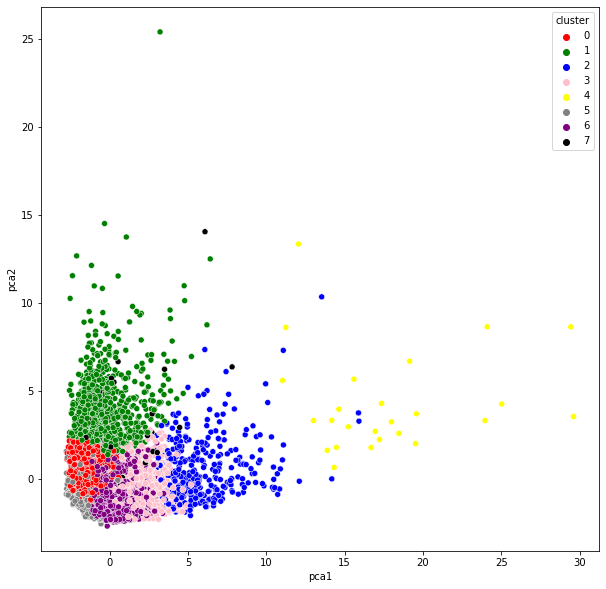

In [61]:
plt.figure(figsize = (10, 10))
sns.scatterplot(
    x = 'pca1',
    y = 'pca2',
    hue = 'cluster',
    data = pca_df,
    palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black']
)

## Aplicação de autoencoders

In [62]:
creditcard_df_scaled.shape

(8950, 17)

In [63]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [66]:
input_df = Input(shape = (17,))
x = Dense(500, activation = 'relu')(input_df)
x = Dense(2000, activation = 'relu')(x)

encoded = Dense(10, activation = 'relu')(x)

x = Dense(2000, activation = 'relu')(encoded)
x = Dense(500, activation = 'relu')(x)

decoded = Dense(17)(x)

In [68]:
#autoencoder
autoencoder = Model(input_df, decoded)

In [69]:
#encoder
encoder = Model(input_df, encoded)

In [70]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [71]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 49s 141ms/step - loss: 0.1893
Epoch 2/50
280/280 [==============================] - 41s 146ms/step - loss: 0.0899
Epoch 3/50
280/280 [==============================] - 38s 137ms/step - loss: 0.06550s - loss: 0.06
Epoch 4/50
280/280 [==============================] - 26s 94ms/step - loss: 0.0396
Epoch 5/50
280/280 [==============================] - 25s 90ms/step - loss: 0.0371
Epoch 6/50
280/280 [==============================] - 23s 84ms/step - loss: 0.0427
Epoch 7/50
280/280 [==============================] - 21s 73ms/step - loss: 0.0872
Epoch 8/50
280/280 [==============================] - 21s 75ms/step - loss: 0.0940
Epoch 9/50
280/280 [==============================] - 18s 66ms/step - loss: 0.0699
Epoch 10/50
280/280 [==============================] - 18s 65ms/step - loss: 0.0392
Epoch 11/50
280/280 [==============================] - 23s 81ms/step - loss: 0.0333
Epoch 12/50
280/280 [==============================] - 24s 85ms/ste

In [72]:
compact = encoder.predict(creditcard_df_scaled)

In [73]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(compact)
    wcss_2.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

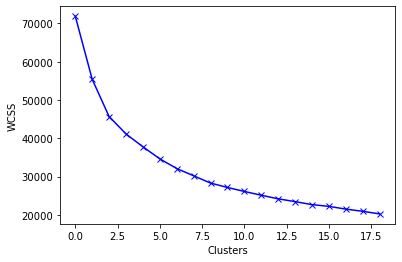

In [74]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

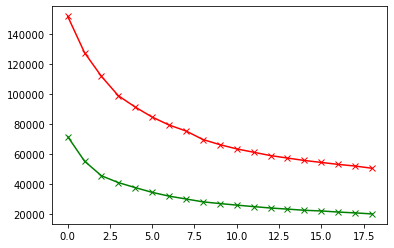

In [75]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g')

In [76]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [77]:
labels = kmeans.labels_
labels, labels.shape

(array([1, 1, 1, ..., 0, 0, 3]), (8950,))

In [78]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluester': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluester
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [79]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.123627,0.045016
1,0.188782,1.022848
2,-1.325765,-0.838538
3,-0.715672,-0.098959
4,-1.209986,-0.074532


In [87]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.123627,0.045016,1
1,0.188782,1.022848,1
2,-1.325765,-0.838538,1
3,-0.715672,-0.098959,1
4,-1.209986,-0.074532,1


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

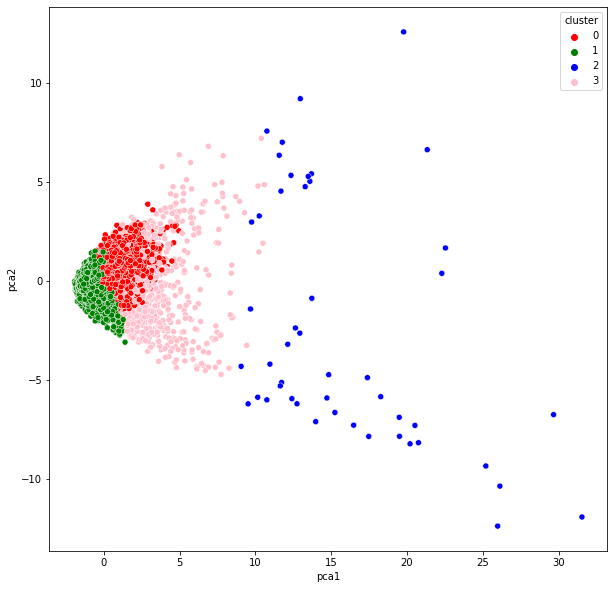

In [88]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [91]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluester')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluester
4764,165.290723,0.818182,971.20,971.20,0.0,446.945370,0.166667,0.166667,0.0,0.083333,1,3,1000.0,1922.505496,124.779308,0.666667,12,0
7415,43.087983,0.571429,133.00,133.00,0.0,0.000000,0.142857,0.142857,0.0,0.000000,0,1,3000.0,189.248952,96.858626,0.000000,7,0
7413,198.951791,0.250000,0.00,0.00,0.0,1365.186290,0.000000,0.000000,0.0,0.125000,1,0,2500.0,0.000000,864.206542,0.000000,8,0
7411,104.311214,0.818182,1270.59,1270.59,0.0,0.000000,0.583333,0.583333,0.0,0.000000,0,8,2000.0,1359.473756,147.450120,1.000000,12,0
1774,2303.956234,0.888889,0.00,0.00,0.0,5585.815801,0.000000,0.000000,0.0,0.777778,21,0,6000.0,331.450159,443.577040,0.000000,9,0


In [92]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluester
7202,3211.389574,1.000000,0.00,0.00,0.00,4464.940638,0.000000,0.000000,0.0,0.583333,45,0,6500.0,6925.733929,978.238735,0.083333,12,3
2015,5919.198579,1.000000,9321.13,4678.79,4642.34,0.000000,1.000000,1.000000,1.0,0.000000,0,171,15000.0,7303.897866,1395.715133,0.000000,12,3
7195,2283.366217,1.000000,2734.77,1645.87,1088.90,4303.863961,0.833333,0.583333,0.5,0.750000,23,24,9500.0,8122.574527,512.099872,0.083333,12,3
7235,162.267397,1.000000,907.99,907.99,0.00,339.493008,1.000000,1.000000,0.0,0.166667,2,8,1120.0,1223.617997,75.319725,1.000000,6,3
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.0,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,3


In [ ]:
df_cluster_ordered.to_excel('data/cluster_ordereded.xls')

<ipython-input-93-7280f83186e2>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_cluster_ordered.to_excel('data/cluster_ordereded.xls')
